In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV

In [54]:
df = pd.read_csv('/workspaces/Data_Engineering/fase_1.xlsx')
df.head()

,0,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,0,20031358,Leonardo,Pires,Psicologia,15,True,16.0
1,1,2022158,Raquel,Laranjeira,Informática,17,True,11.0
2,2,2003812,Anne,Silva,Informática,16,True,16.0
3,3,2022901,Patrícia,Castelo-Branco,Informática,11,True,17.0
4,4,2019303,Avelino,Sampaio,Comunicação,13,True,18.0


### Read txt

In [55]:
df_text= pd.read_csv('/workspaces/Data_Engineering/fase_1.txt')
df_text.head()

,0\tnr_aluno\tnome\tapelido\tcurso\tmedia_entrada\tcurso_concluido\tmedia_final
0,100\t2210000\tThomas Anderson\t(Neo)\tInformát...
1,201\t2290110\tAnakin Skywalker\t(Lord Vader)\t...
2,804\t2210030\tSininho\t(Terra do Nunca)\tCinti...
3,34\t2019990\tLeonardo\tCapicua\tComunicação\t2...
4,42\t2021652\tLucas\tMachado\tInformática\t21\t...


## EDA

In [56]:
df.head()

,0,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,0,20031358,Leonardo,Pires,Psicologia,15,True,16.0
1,1,2022158,Raquel,Laranjeira,Informática,17,True,11.0
2,2,2003812,Anne,Silva,Informática,16,True,16.0
3,3,2022901,Patrícia,Castelo-Branco,Informática,11,True,17.0
4,4,2019303,Avelino,Sampaio,Comunicação,13,True,18.0


In [57]:
df.describe()

,0,nr_aluno,media_entrada,media_final
count,1729.000000,1.729000e+03,1729.000000,1729.000000
mean,893.531521,6.999483e+07,15.065356,14.945633
std,501.405892,3.240864e+08,3.244263,3.229179
min,0.000000,2.021600e+04,0.000000,10.000000
25%,462.000000,2.019513e+06,12.000000,12.000000
50%,895.000000,2.022522e+06,15.000000,15.000000
75%,1327.000000,2.020136e+07,18.000000,18.000000
max,1759.000000,2.022174e+09,20.000000,21.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                1729 non-null   int64  
 1   nr_aluno         1729 non-null   int64  
 2   nome             1729 non-null   object 
 3   apelido          1729 non-null   object 
 4   curso            1718 non-null   object 
 5   media_entrada    1729 non-null   int64  
 6   curso_concluido  1729 non-null   bool   
 7   media_final      1729 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 96.4+ KB


In [59]:
df.describe(include=['object'])

,nome,apelido,curso
count,1729,1729,1718
unique,30,14,3
top,Rita,Morais,Psicologia
freq,115,172,586


In [60]:
df[df['curso'] == 'NaN']

,0,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final


In [61]:
df[df['curso'] == 'NULL']

,0,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final


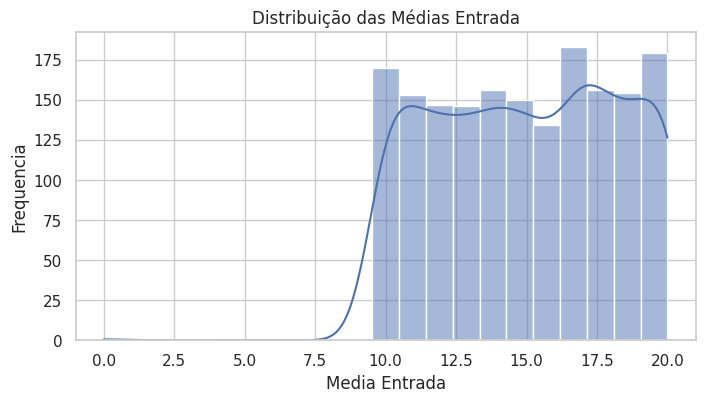

In [62]:
plt.figure(figsize=(8, 4))
sns.histplot(df['media_entrada'], kde=True)
plt.title('Distribuição das Médias Entrada')
plt.xlabel('Media Entrada')
plt.ylabel('Frequencia')
plt.show()

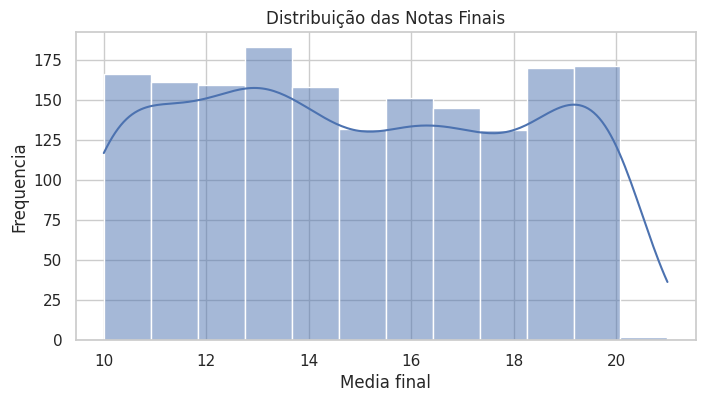

In [63]:
plt.figure(figsize=(8, 4))
sns.histplot(df['media_final'], kde=True)
plt.title('Distribuição das Notas Finais')
plt.xlabel('Media final')
plt.ylabel('Frequencia')
plt.show()

In [64]:
df.columns

Index(['0', 'nr_aluno', 'nome', 'apelido', 'curso', 'media_entrada',
       'curso_concluido', 'media_final'],
      dtype='object')

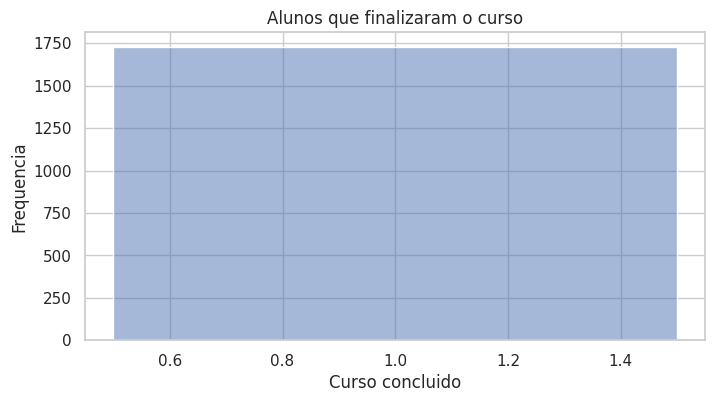

In [65]:
plt.figure(figsize=(8, 4))
sns.histplot(df['curso_concluido'], kde=True)
plt.title('Alunos que finalizaram o curso')
plt.xlabel('Curso concluido')
plt.ylabel('Frequencia')
plt.show()

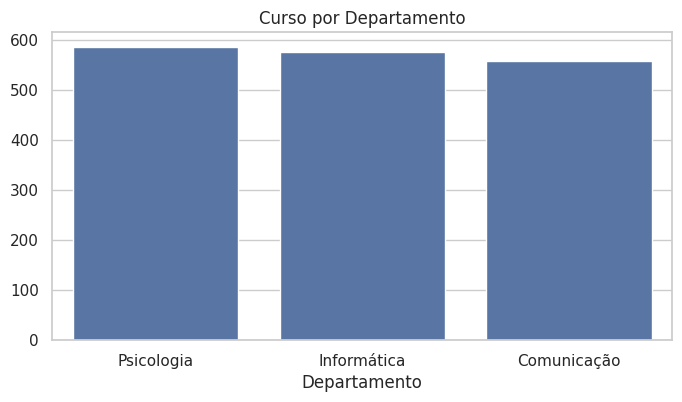

In [79]:
plt.figure(figsize=(8, 4))
sns.countplot(x='curso', data=df)
plt.title('Curso por Departamento')
plt.xlabel('Departamento')
plt.ylabel('')
plt.show()

In [67]:
df.columns

Index(['0', 'nr_aluno', 'nome', 'apelido', 'curso', 'media_entrada',
       'curso_concluido', 'media_final'],
      dtype='object')

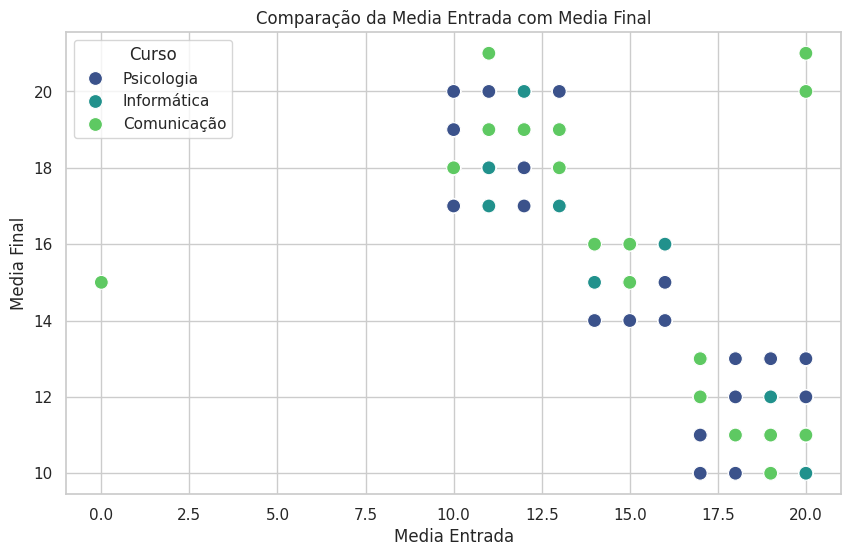

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='media_entrada', y='media_final', hue='curso', data=df, s=100, palette='viridis')
plt.title('Comparação da Media Entrada com Media Final')
plt.xlabel('Media Entrada')
plt.ylabel('Media Final')
plt.legend(title='Curso')
plt.grid(True)
plt.show()

<Axes: xlabel='media_entrada', ylabel='media_final'>

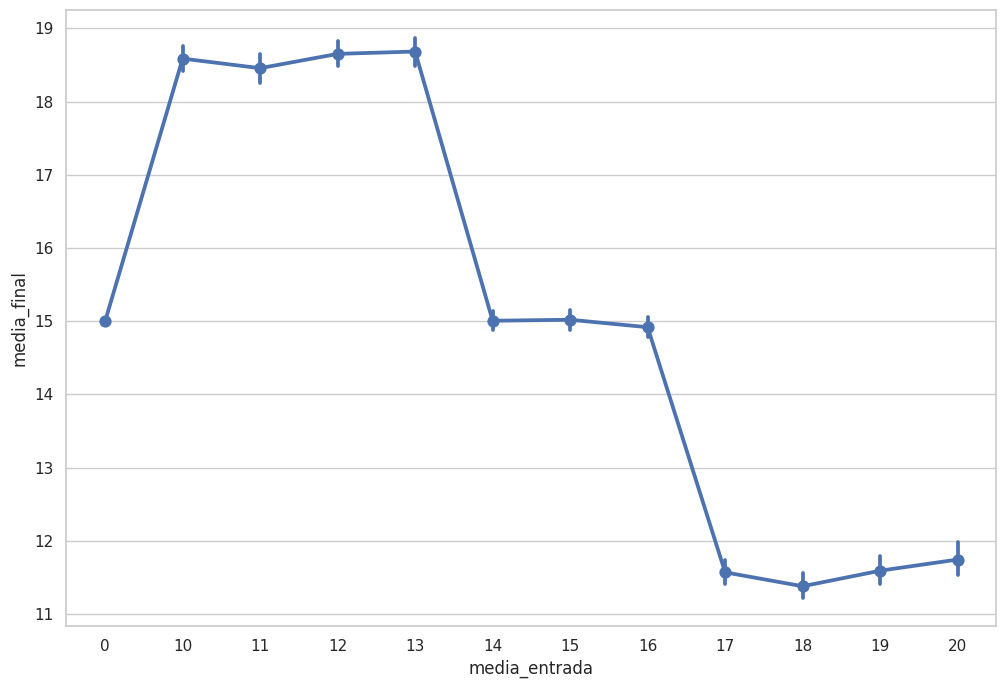

In [82]:
plt.figure(figsize=(12, 8))
sns.pointplot(x="media_entrada", y="media_final", data=df)

In [92]:
psych_students_15 = df[(df['curso'] == 'Psicologia') & (df['media_entrada'] == 15)]
finished_count = psych_students_15['curso_concluido'].notnull().sum()

finished_count

#df[df['curso'] == 'Psicologia'].count()

np.int64(57)

### Pergunta 1ª fase

Existe alguma relação entre a média de entrada na licenciatura e a média de
conclusão da licenciatura?


In [70]:
df.columns

Index(['0', 'nr_aluno', 'nome', 'apelido', 'curso', 'media_entrada',
       'curso_concluido', 'media_final'],
      dtype='object')

In [71]:
df['media_final'] = df['media_final'].astype(int)

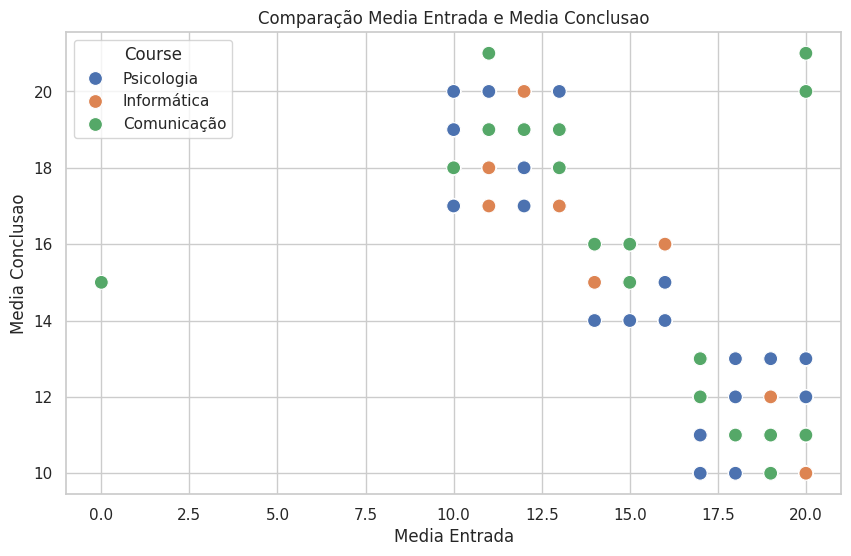

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='media_entrada', y='media_final', hue='curso', data=df, s=100)
plt.title('Comparação Media Entrada e Media Conclusao')
plt.xlabel('Media Entrada')
plt.ylabel('Media Conclusao')
plt.legend(title='Course')
plt.grid(True)
plt.show()

### Pergunta 2ª fase

 Existe alguma relação entre a origem dos alunos (curso profissional ou curso do
ensino geral) e a média final da licenciatura?

In [75]:
df.columns

Index(['0', 'nr_aluno', 'nome', 'apelido', 'curso', 'media_entrada',
       'curso_concluido', 'media_final'],
      dtype='object')